# Regression of different types


In [1]:
from helpers import (
    add_instances_n,
    draw_regression_graph,
    fit_regression,
    get_experiments_data,
    get_attach_indexes,
    get_data_with_metrics,
)

## Linpack 1x20min, wrk 11x20min

In [2]:
experiment_name = 'linpack_1x20_wrk_11x20'

exp_name, df = next(get_data_with_metrics(experiment_name, instances_n=12))

df.head()

,cbtool_time,cpu_time,app_latency,app_throughput,cpu,memory,instances_n
0,1592345370,1592345373,NaN,33.1788,2033.0,5.224841e+09,1.0
1,1592345430,1592345434,NaN,33.2207,2036.0,5.223846e+09,1.0
2,1592345490,1592345494,NaN,33.4935,2039.0,5.223973e+09,1.0
3,1592345550,1592345554,NaN,33.4500,2038.0,5.224157e+09,1.0
4,1592345620,1592345615,NaN,33.0648,2050.0,5.216788e+09,1.0


/home/godul/.local/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in reduce
  result = getattr(ufunc, method)(*inputs, **kwargs)


                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     624.0
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           1.82e-52
Time:                        19:36:31   Log-Likelihood:                -341.36
No. Observations:                 137   AIC:                             686.7
Df Residuals:                     135   BIC:                             692.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      29.7440      0.465     63.930      

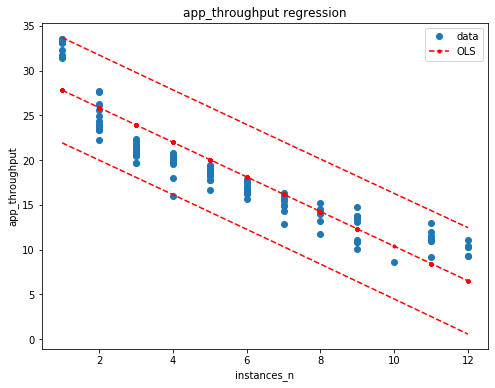

In [3]:
results = fit_regression(data=df, formula='app_throughput ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='app_throughput', variable='instances_n')

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     813.8
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           5.10e-59
Time:                        19:36:31   Log-Likelihood:                -326.07
No. Observations:                 137   AIC:                             656.1
Df Residuals:                     135   BIC:                             662.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.1030      0.674     56.502      0.0

/home/godul/.local/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in reduce
  result = getattr(ufunc, method)(*inputs, **kwargs)


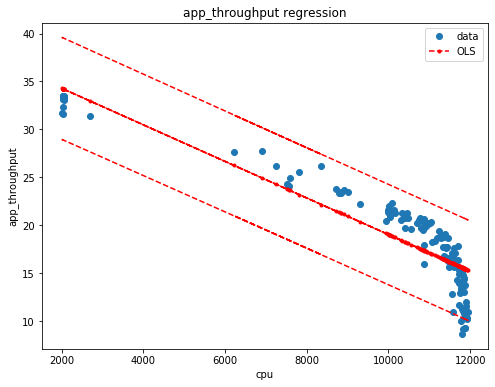

In [4]:
results = fit_regression(data=df, formula='app_throughput ~ cpu')
print(results.summary())
draw_regression_graph(results, df, metric_name='app_throughput', variable='cpu')

In [5]:
results = fit_regression(data=df, formula='app_throughput ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         app_throughput   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     3220.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):          5.22e-114
Time:                        19:36:31   Log-Likelihood:                -192.95
No. Observations:                 137   AIC:                             391.9
Df Residuals:                     134   BIC:                             400.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      36.4862      0.262    139.016      

/home/godul/.local/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in reduce
  result = getattr(ufunc, method)(*inputs, **kwargs)


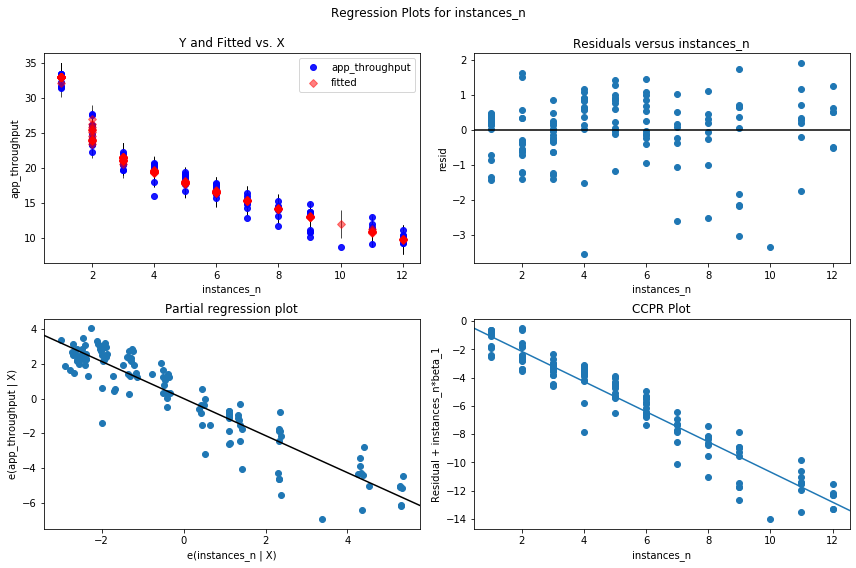

In [6]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "instances_n", fig=fig)

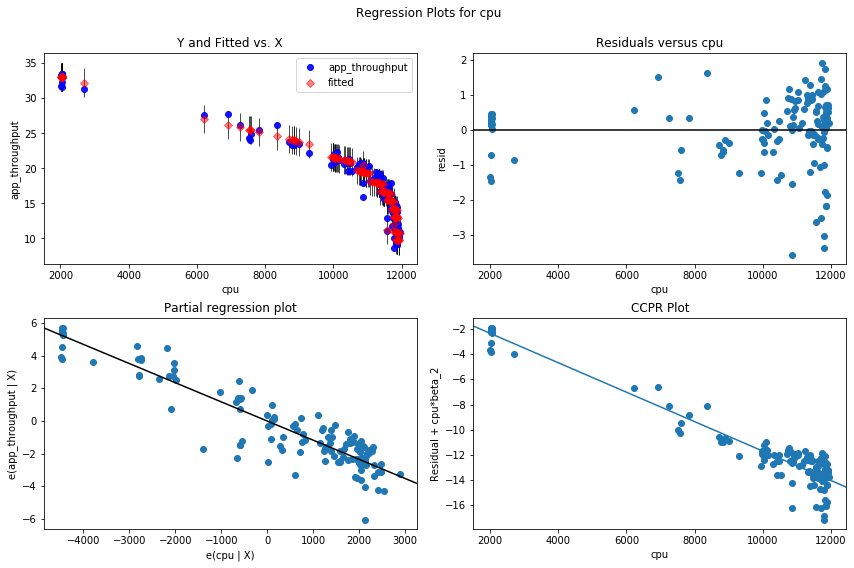

In [7]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "cpu", fig=fig)

                            OLS Regression Results                            
Dep. Variable:                    cpu   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     141.8
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           8.48e-23
Time:                        19:36:32   Log-Likelihood:                -1257.9
No. Observations:                 137   AIC:                             2520.
Df Residuals:                     135   BIC:                             2526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5763.5765    374.244     15.401      

/home/godul/.local/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in reduce
  result = getattr(ufunc, method)(*inputs, **kwargs)


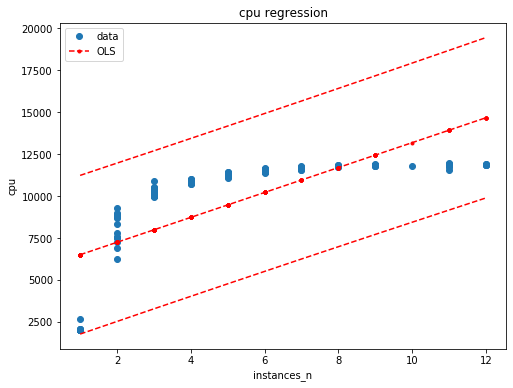

In [8]:
results = fit_regression(data=df, formula='cpu ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='cpu', variable='instances_n')

## Wrk 1x20min, linpack 11x20min

In [9]:
experiment_name = 'wrk_1x20_linpack_11x20'

exp_name, df = next(get_data_with_metrics(experiment_name, instances_n=12))

df.head()

,cbtool_time,cpu_time,app_latency,app_throughput,cpu,memory,instances_n
0,1592329774,1592329770,25.19,7080.0,8086.0,4.988146e+09,1.0
1,1592330253,1592330255,14.94,8920.0,7363.0,4.992172e+09,1.0
2,1592330316,1592330316,10.08,20170.0,6800.0,4.990689e+09,1.0
3,1592330380,1592330376,20.57,5360.0,7931.0,4.989276e+09,1.0
4,1592330604,1592330608,10.06,20200.0,6401.0,4.987568e+09,1.0


                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     941.6
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           2.72e-45
Time:                        19:36:33   Log-Likelihood:                -294.54
No. Observations:                  80   AIC:                             593.1
Df Residuals:                      78   BIC:                             597.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.1230      2.264     -1.380      

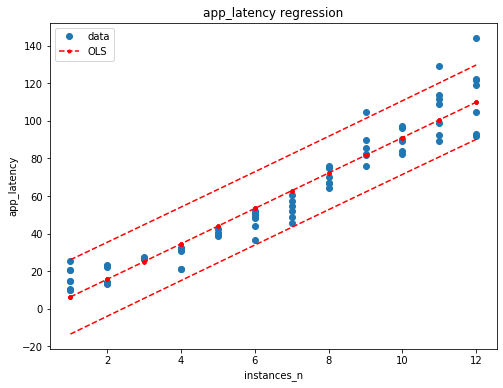

In [10]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     203.6
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           1.89e-23
Time:                        19:36:33   Log-Likelihood:                -345.99
No. Observations:                  80   AIC:                             696.0
Df Residuals:                      78   BIC:                             700.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -123.6116     12.879     -9.598      0.0

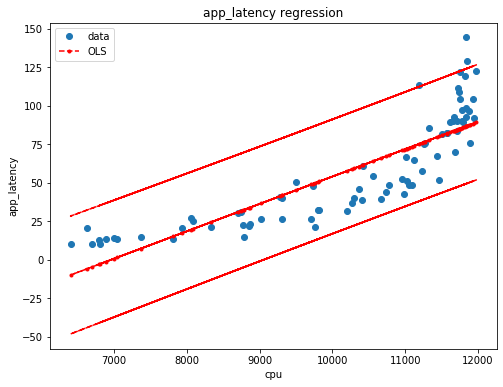

In [11]:
results = fit_regression(data=df, formula='app_latency ~ cpu')
print(results.summary())
draw_regression_graph(results, df, metric_name='app_latency', variable='cpu')

In [12]:
results = fit_regression(data=df, formula='app_latency ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     476.2
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           4.41e-44
Time:                        19:36:33   Log-Likelihood:                -293.63
No. Observations:                  80   AIC:                             593.3
Df Residuals:                      77   BIC:                             600.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.9065     11.560      1.030      

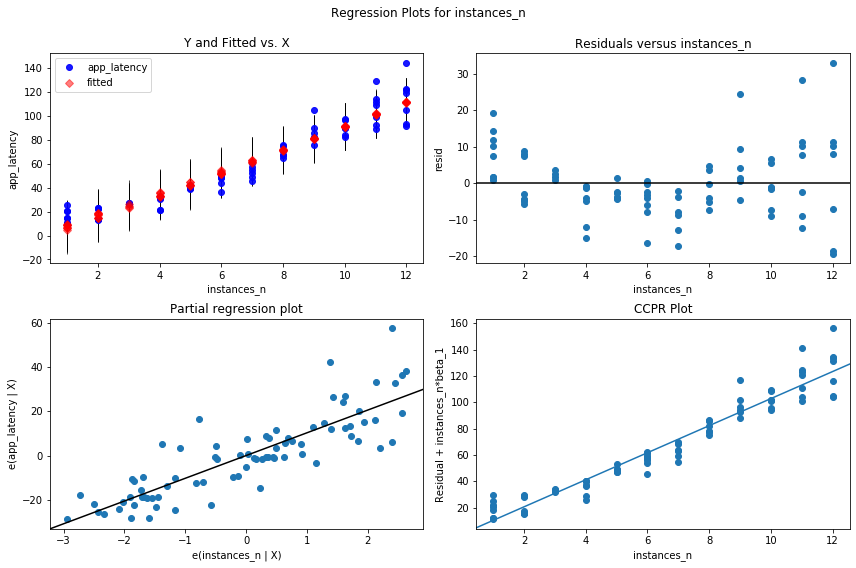

In [13]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "instances_n", fig=fig)

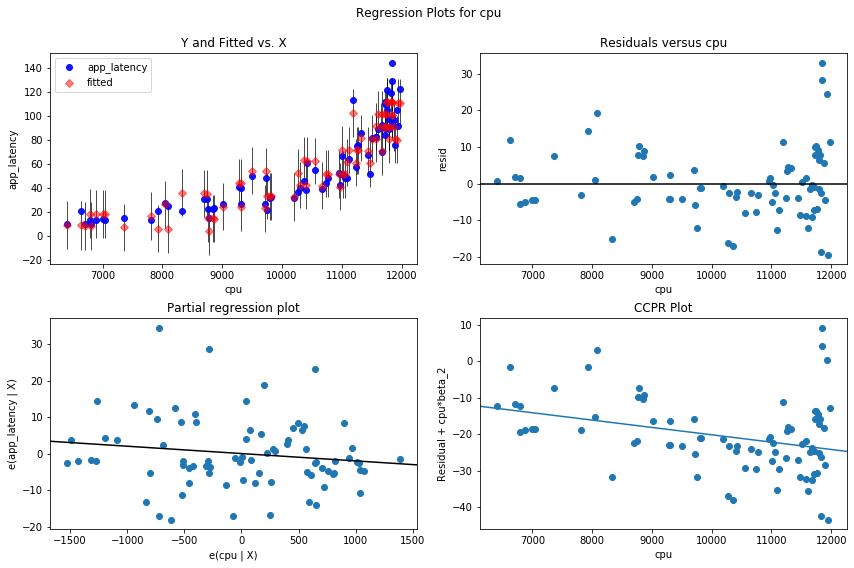

In [14]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, "cpu", fig=fig)

                            OLS Regression Results                            
Dep. Variable:                    cpu   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     345.8
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           2.14e-30
Time:                        19:36:34   Log-Likelihood:                -639.11
No. Observations:                  80   AIC:                             1282.
Df Residuals:                      78   BIC:                             1287.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7468.7980    168.023     44.451      

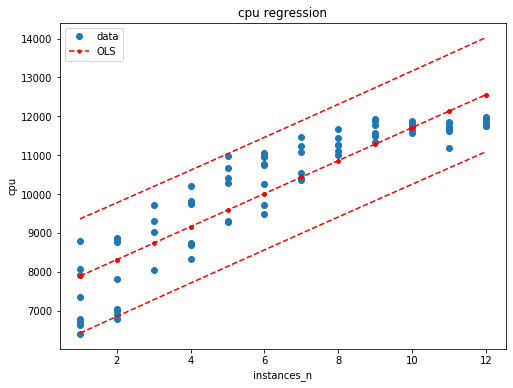

In [15]:
results = fit_regression(data=df, formula='cpu ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='cpu', variable='instances_n')

### What if we ended the experiment earlier?

In [23]:
df = df[df['instances_n'] <= 7]

df.head()

,cbtool_time,cpu_time,app_latency,app_throughput,cpu,memory,instances_n
0,1592329774,1592329770,25.19,7080.0,8086.0,4.988146e+09,1.0
1,1592330253,1592330255,14.94,8920.0,7363.0,4.992172e+09,1.0
2,1592330316,1592330316,10.08,20170.0,6800.0,4.990689e+09,1.0
3,1592330380,1592330376,20.57,5360.0,7931.0,4.989276e+09,1.0
4,1592330604,1592330608,10.06,20200.0,6401.0,4.987568e+09,1.0


                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     348.9
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           7.92e-23
Time:                        19:41:06   Log-Likelihood:                -141.60
No. Observations:                  47   AIC:                             287.2
Df Residuals:                      45   BIC:                             290.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.1251      1.575      3.889      

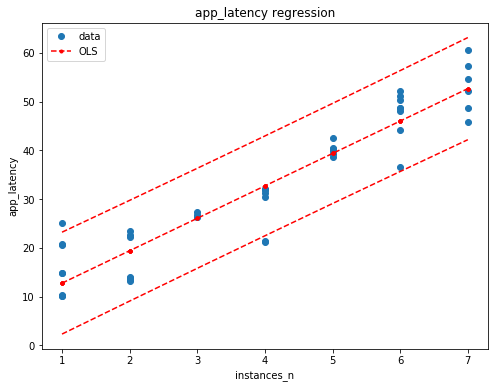

In [24]:
results = fit_regression(data=df, formula='app_latency ~ instances_n')
print(results.summary())
draw_regression_graph(results, df, metric_name='app_latency', variable='instances_n')

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     158.1
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           2.49e-16
Time:                        19:41:09   Log-Likelihood:                -157.16
No. Observations:                  47   AIC:                             318.3
Df Residuals:                      45   BIC:                             322.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -47.8708      6.445     -7.427      0.0

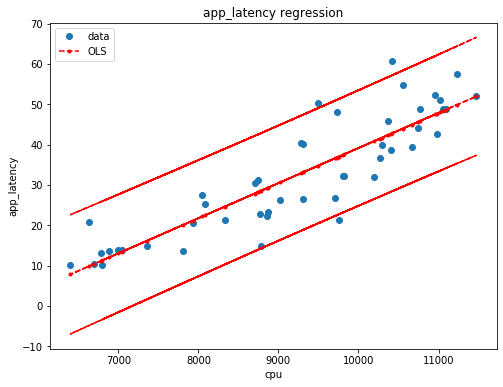

In [25]:
results = fit_regression(data=df, formula='app_latency ~ cpu')
print(results.summary())
draw_regression_graph(results, df, metric_name='app_latency', variable='cpu')

In [26]:
results = fit_regression(data=df, formula='app_latency ~ instances_n + cpu')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            app_latency   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     200.1
Date:                Wed, 17 Jun 2020   Prob (F-statistic):           8.13e-23
Time:                        19:41:16   Log-Likelihood:                -138.25
No. Observations:                  47   AIC:                             282.5
Df Residuals:                      44   BIC:                             288.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -10.7327      6.660     -1.611      